In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [ ]:
df = pd.read_csv("/content/UpdatedResumeDataSet.csv")
df

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."
...,...,...
957,Testing,Computer Skills: â¢ Proficient in MS office (...
958,Testing,â Willingness to accept the challenges. â ...
959,Testing,"PERSONAL SKILLS â¢ Quick learner, â¢ Eagerne..."
960,Testing,COMPUTER SKILLS & SOFTWARE KNOWLEDGE MS-Power ...


In [ ]:
df.isnull().sum()

Category    0
Resume      0
dtype: int64

In [ ]:
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split

In [ ]:
labels = df['Category']

In [ ]:
labels.value_counts()

Java Developer               84
Testing                      70
DevOps Engineer              55
Python Developer             48
Web Designing                45
HR                           44
Hadoop                       42
Blockchain                   40
ETL Developer                40
Operations Manager           40
Data Science                 40
Sales                        40
Mechanical Engineer          40
Arts                         36
Database                     33
Electrical Engineering       30
Health and fitness           30
PMO                          30
Business Analyst             28
DotNet Developer             28
Automation Testing           26
Network Security Engineer    25
SAP Developer                24
Civil Engineer               24
Advocate                     20
Name: Category, dtype: int64

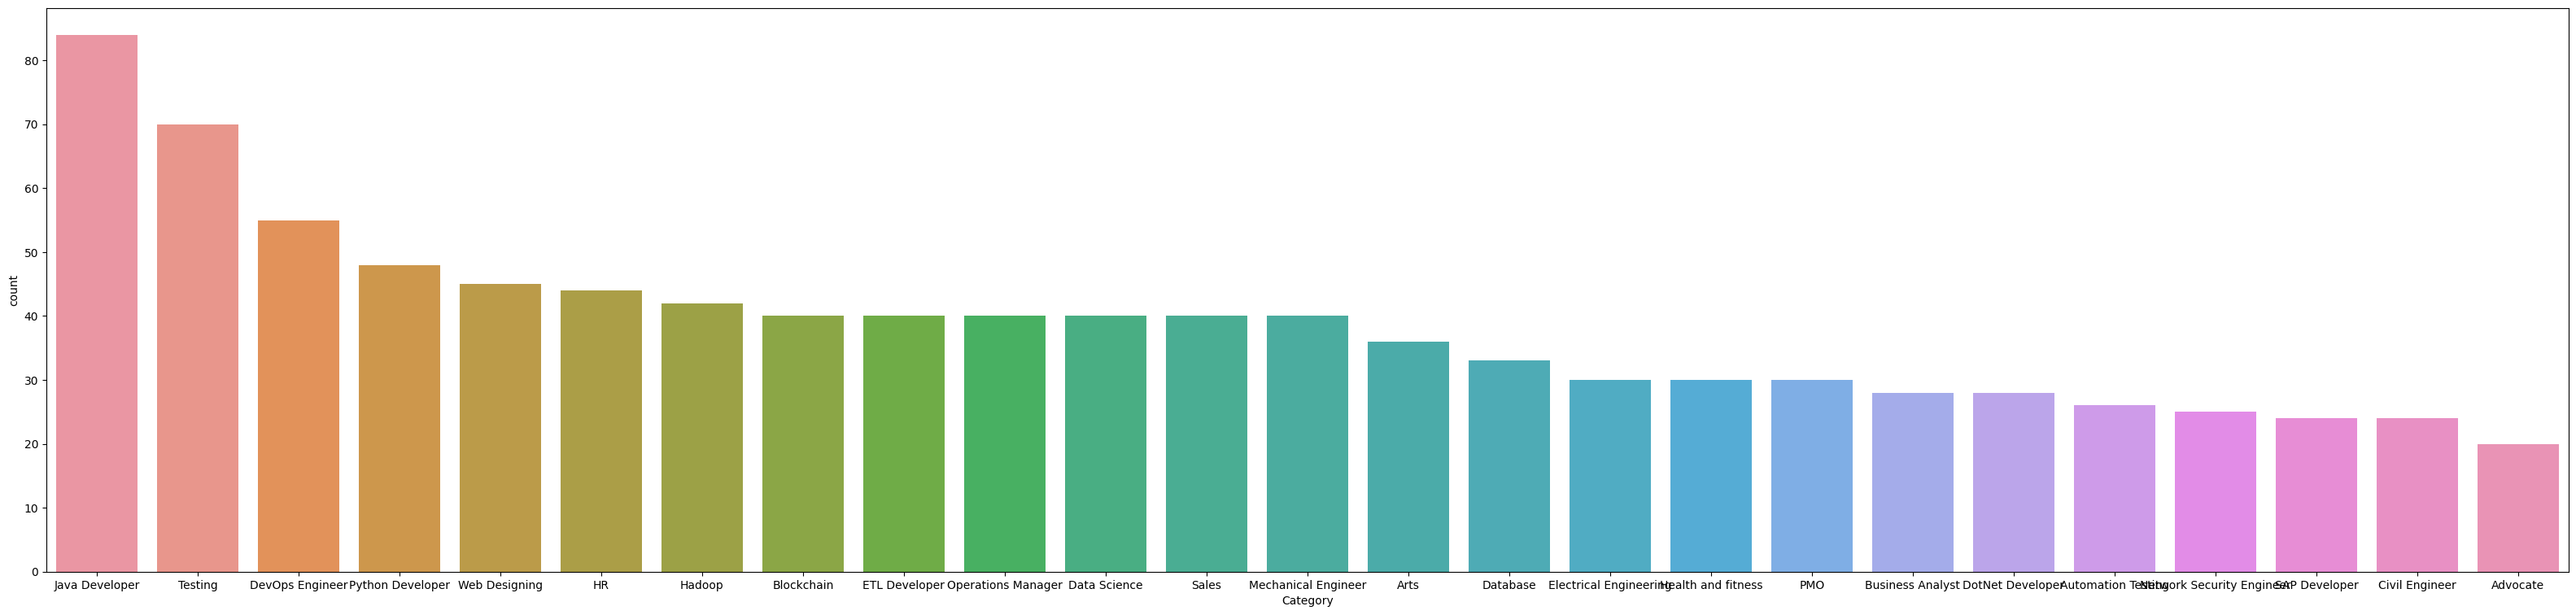

In [ ]:
plt.figure(figsize=(40,9))
sns.countplot(x ='Category', data= df, order= df['Category'].value_counts().index)
plt.show()

In [ ]:
#data cleaning for the resumes
import re
def clean_function(resumeText):
    resumeText = re.sub('http\S+\s*', ' ', resumeText)  # remove URLs
    resumeText = re.sub('RT|cc', ' ', resumeText)  # remove RT and cc
    resumeText = re.sub('#\S+', '', resumeText)  # remove hashtags
    resumeText = re.sub('@\S+', '  ', resumeText)  # remove mentions
    resumeText = re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""), ' ', resumeText)  # remove punctuations
    resumeText = re.sub(r'[^\x00-\x7f]',r' ', resumeText)
    resumeText = re.sub('\s+', ' ', resumeText)  # remove extra whitespace
    return resumeText

In [ ]:
df['cleaned_resume']=df['Resume'].apply(lambda x:clean_function(x))
df

,Category,Resume,cleaned_resume
0,Data Science,Skills * Programming Languages: Python (pandas...,Skills Programming Languages Python pandas num...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...,Education Details May 2013 to May 2017 B E UIT...
2,Data Science,"Areas of Interest Deep Learning, Control Syste...",Areas of Interest Deep Learning Control System...
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,Skills R Python SAP HANA Tableau SAP HANA SQL ...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab...",Education Details MCA YMCAUST Faridabad Haryan...
...,...,...,...
957,Testing,Computer Skills: â¢ Proficient in MS office (...,Computer Skills Proficient in MS office Word B...
958,Testing,â Willingness to accept the challenges. â ...,Willingness to a ept the challenges Positive ...
959,Testing,"PERSONAL SKILLS â¢ Quick learner, â¢ Eagerne...",PERSONAL SKILLS Quick learner Eagerness to lea...
960,Testing,COMPUTER SKILLS & SOFTWARE KNOWLEDGE MS-Power ...,COMPUTER SKILLS SOFTWARE KNOWLEDGE MS Power Po...


In [ ]:
inputs = df['cleaned_resume']
inputs

0      Skills Programming Languages Python pandas num...
1      Education Details May 2013 to May 2017 B E UIT...
2      Areas of Interest Deep Learning Control System...
3      Skills R Python SAP HANA Tableau SAP HANA SQL ...
4      Education Details MCA YMCAUST Faridabad Haryan...
                             ...                        
957    Computer Skills Proficient in MS office Word B...
958     Willingness to a ept the challenges Positive ...
959    PERSONAL SKILLS Quick learner Eagerness to lea...
960    COMPUTER SKILLS SOFTWARE KNOWLEDGE MS Power Po...
961    Skill Set OS Windows XP 7 8 8 1 10 Database MY...
Name: cleaned_resume, Length: 962, dtype: object

In [ ]:
inputs_train, inputs_test, Ytrain, Ytest = train_test_split(inputs, labels, random_state=123)

In [ ]:
import nltk
from nltk import word_tokenize
from nltk.stem import WordNetLemmatizer, PorterStemmer
from nltk.corpus import wordnet

In [ ]:
nltk.download("wordnet")
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [ ]:
vectorizer = CountVectorizer()

In [ ]:
Xtrain = vectorizer.fit_transform(inputs_train)
Xtest = vectorizer.transform(inputs_test)

In [ ]:
Xtrain

<721x7465 sparse matrix of type '<class 'numpy.int64'>'
	with 140450 stored elements in Compressed Sparse Row format>

In [ ]:
(Xtrain != 0).sum()/np.prod(Xtrain.shape)

0.0260949618794318

In [ ]:
model = MultinomialNB()
model.fit(Xtrain,Ytrain)
print("Train score:",model.score(Xtrain,Ytrain))
print("Test score:",model.score(Xtest,Ytest))

Train score: 0.9986130374479889
Test score: 0.966804979253112


In [ ]:
# with stopwords
vectorizer1 = CountVectorizer(stop_words='english')
Xtrain1 = vectorizer1.fit_transform(inputs_train)
Xtest1 = vectorizer1.transform(inputs_test)
model = MultinomialNB()
model.fit(Xtrain1, Ytrain)
print("train score:", model.score(Xtrain1, Ytrain))
print("test score:", model.score(Xtest1, Ytest))

train score: 0.9986130374479889
test score: 0.966804979253112


In [ ]:
class StemTokenizer:
  def __init__(self):
    self.porter = PorterStemmer()
  def __call__(self, doc):
    tokens = word_tokenize(doc)
    return [self.porter.stem(t) for t in tokens]

In [ ]:
vectorizer2 = CountVectorizer(tokenizer=StemTokenizer())
Xtrain2 = vectorizer2.fit_transform(inputs_train)
Xtest2 = vectorizer2.transform(inputs_test)
model = MultinomialNB()
model.fit(Xtrain2, Ytrain)
print("train score:", model.score(Xtrain2, Ytrain))
print("test score:", model.score(Xtest2, Ytest))

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


train score: 0.9986130374479889
test score: 0.966804979253112


In [ ]:
def simple_tokenizer(s):
  return s.split()

In [ ]:
vectorizer3 = CountVectorizer(tokenizer=simple_tokenizer)
Xtrain3 = vectorizer3.fit_transform(inputs_train)
Xtest3 = vectorizer3.transform(inputs_test)
model = MultinomialNB()
model.fit(Xtrain3, Ytrain)
print("train score:", model.score(Xtrain3, Ytrain))
print("test score:", model.score(Xtest3, Ytest))

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


train score: 0.9944521497919556
test score: 0.9626556016597511


In [ ]:
from sklearn.ensemble import RandomForestClassifier as RFC

In [ ]:
vectorizer4 = CountVectorizer()
Xtrain4 = vectorizer4.fit_transform(inputs_train)
Xtest4 = vectorizer4.transform(inputs_test)
model = RFC(max_depth = 15)
model.fit(Xtrain4, Ytrain)
print("train score:", model.score(Xtrain4, Ytrain))
print("test score:", model.score(Xtest4, Ytest))

train score: 0.9972260748959778
test score: 0.970954356846473


In [ ]:
#with Stemming
vectorizer5 = CountVectorizer(tokenizer=StemTokenizer())
Xtrain5 = vectorizer5.fit_transform(inputs_train)
Xtest5 = vectorizer5.transform(inputs_test)
model = RFC(max_depth=100)
model.fit(Xtrain5, Ytrain)
print("train score:", model.score(Xtrain5, Ytrain))
print("test score:", model.score(Xtest5, Ytest))
#cannot use this model due to overfitting

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


train score: 1.0
test score: 0.983402489626556


In [ ]:
#final model
vectorizer4 = CountVectorizer(stop_words='english')
Xtrain4 = vectorizer4.fit_transform(inputs_train)
Xtest4 = vectorizer4.transform(inputs_test)
final_model = RFC(max_depth = 15)
final_model.fit(Xtrain4, Ytrain)
print("train score:", final_model.score(Xtrain4, Ytrain))
print("test score:",final_model.score(Xtest4, Ytest))

train score: 0.9986130374479889
test score: 0.966804979253112


In [ ]:
labels.value_counts()

Java Developer               84
Testing                      70
DevOps Engineer              55
Python Developer             48
Web Designing                45
HR                           44
Hadoop                       42
Blockchain                   40
ETL Developer                40
Operations Manager           40
Data Science                 40
Sales                        40
Mechanical Engineer          40
Arts                         36
Database                     33
Electrical Engineering       30
Health and fitness           30
PMO                          30
Business Analyst             28
DotNet Developer             28
Automation Testing           26
Network Security Engineer    25
SAP Developer                24
Civil Engineer               24
Advocate                     20
Name: Category, dtype: int64

In [ ]:
def new_inputs(resumes):
    cleaned_resumes = resumes.apply(lambda x:clean_function(x))
    transformed_resumes = vectorizer4.transform(cleaned_resumes)
    return transformed_resumes

In [ ]:
#Here I have used the skills from my own resume in order to test the model.
x =  "Python, C , SQL,Hadoop, Spark, clustering, neural networks, "
new_df = pd.Series(x)
pred = final_model.predict(new_inputs(new_df))
pred

array(['Hadoop'], dtype=object)

In [ ]:
!pip install joblib


In [ ]:
import joblib

# Save the model to a file
joblib.dump(final_model, 'final_model_RFC.pkl')


['final_model_RFC.pkl']

In [ ]:
# Load the model from the file
loaded_model = joblib.load('final_model_RFC.pkl')

# Now, you can use this loaded_model for predictions or further analysis


In [ ]:
#Here I have used the skills from my own resume in order to test the model.
x =  "Python, C , SQL,Hadoop, Spark, clustering, neural networks, "
new_df = pd.Series(x)
pred = loaded_model.predict(new_inputs(new_df))
pred[0]

'Hadoop'

In [ ]:
!pip install pdfplumber

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.0/49.0 kB 884.1 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 22.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 96.6 MB/s eta 0:00:00


In [ ]:
!pip install PyPDF2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 232.6/232.6 kB 2.0 MB/s eta 0:00:00


for single

In [ ]:
import PyPDF2
import re
from nltk.tokenize import word_tokenize

def extract_text_from_pdf(file_path):
    with open(file_path, 'rb') as file:
        reader = PyPDF2.PdfReader(file)
        text = ''.join(page.extract_text() for page in reader.pages)
    return text

def extract_skills(text):
    tokens = word_tokenize(text.lower())
    return [re.sub(r'\W+', '', string) for string in tokens]

 
resume_path = '/content/Siddhesh Mhatre.pdf'

 
resume_text = extract_text_from_pdf(resume_path)

 
candidate_skills = extract_skills(resume_text)
cleaned_list = [re.sub(r'\W+', '', string) for string in candidate_skills]

result = ', '.join([string for string in cleaned_list if string.strip()])
new_df = pd.Series(result)
pred = loaded_model.predict(new_inputs(new_df))
pred[0]  


'Python Developer'

For multiple

In [ ]:
import os
import PyPDF2
import re
from nltk.tokenize import word_tokenize
import pandas as pd

# Function to extract text from a PDF file
def extract_text_from_pdf(file_path):
    with open(file_path, 'rb') as file:
        reader = PyPDF2.PdfReader(file)
        text = ''.join(page.extract_text() for page in reader.pages)
    return text

# Function to extract skills from text
def extract_skills(text):
    tokens = word_tokenize(text.lower())
    return [re.sub(r'\W+', '', string) for string in tokens]

# Directory containing resumes
resumes_directory = '/content/drive/MyDrive/New Resume/ALL resumes/INFORMATION-TECHNOLOGY'

# Load the saved RFC model
loaded_model = joblib.load('final_model_RFC.pkl')  # Replace with your model path

# Predict category for each resume
for root, dirs, files in os.walk(resumes_directory):
    for file_name in files:
        if file_name.endswith('.pdf'):
            resume_path = os.path.join(root, file_name)

            # Extract text from the PDF resume
            resume_text = extract_text_from_pdf(resume_path)

            # Extract skills from the resume text
            candidate_skills = extract_skills(resume_text)
            cleaned_list = [re.sub(r'\W+', '', string) for string in candidate_skills]

            result = ', '.join([string for string in cleaned_list if string.strip()])
            new_df = pd.Series(result)
            pred = loaded_model.predict(new_inputs(new_df))
            print(f"File: {file_name}, Predicted Category: {pred[0]}")


File: 13405733.pdf, Predicted Category: Sales
File: 90867631.pdf, Predicted Category: Database
File: 21780877.pdf, Predicted Category: Network Security Engineer
File: 18752129.pdf, Predicted Category: Mechanical Engineer
File: 13836471.pdf, Predicted Category: Network Security Engineer
File: 23666211.pdf, Predicted Category: PMO
File: 36856210.pdf, Predicted Category: Network Security Engineer
File: 20408458.pdf, Predicted Category: Network Security Engineer
File: 24230851.pdf, Predicted Category: Java Developer
File: 17641670.pdf, Predicted Category: Network Security Engineer
File: 10840430.pdf, Predicted Category: Network Security Engineer
File: 24083609.pdf, Predicted Category: HR
File: 52618188.pdf, Predicted Category: SAP Developer
File: 25857360.pdf, Predicted Category: Advocate
File: 22776912.pdf, Predicted Category: Network Security Engineer
File: 51639418.pdf, Predicted Category: Java Developer
File: 18187364.pdf, Predicted Category: Database
File: 91635250.pdf, Predicted Cate

In [ ]:
import os
import PyPDF2
import re
from nltk.tokenize import word_tokenize
import pandas as pd
import shutil

# Function to extract text from a PDF file
def extract_text_from_pdf(file_path):
    with open(file_path, 'rb') as file:
        reader = PyPDF2.PdfReader(file)
        text = ''.join(page.extract_text() for page in reader.pages)
    return text

# Function to extract skills from text
def extract_skills(text):
    tokens = word_tokenize(text.lower())
    return [re.sub(r'\W+', '', string) for string in tokens]

# Directory containing resumes
resumes_directory = '/content/drive/MyDrive/New Resume/ALL resumes/INFORMATION-TECHNOLOGY'

# Load the saved RFC model
loaded_model = joblib.load('final_model_RFC.pkl')  # Replace with your model path

# Predict category for each resume
for root, dirs, files in os.walk(resumes_directory):
    for file_name in files:
        if file_name.endswith('.pdf'):
            resume_path = os.path.join(root, file_name)

            # Extract text from the PDF resume
            resume_text = extract_text_from_pdf(resume_path)

            # Extract skills from the resume text
            candidate_skills = extract_skills(resume_text)
            cleaned_list = [re.sub(r'\W+', '', string) for string in candidate_skills]

            result = ', '.join([string for string in cleaned_list if string.strip()])
            new_df = pd.Series(result)
            pred = loaded_model.predict(new_inputs(new_df))

            predicted_category = pred[0]
            category_folder = os.path.join(resumes_directory, predicted_category)

            if not os.path.exists(category_folder):
                os.makedirs(category_folder)

            destination_path = os.path.join(category_folder, file_name)
            shutil.move(resume_path, destination_path)
            print(f"Moved {file_name} to {predicted_category} folder")


Moved 13405733.pdf to Sales folder
Moved 90867631.pdf to Database folder
Moved 21780877.pdf to Network Security Engineer folder
Moved 18752129.pdf to Mechanical Engineer folder
Moved 13836471.pdf to Network Security Engineer folder
Moved 23666211.pdf to PMO folder
Moved 36856210.pdf to Network Security Engineer folder
Moved 20408458.pdf to Network Security Engineer folder
Moved 24230851.pdf to Java Developer folder
Moved 17641670.pdf to Network Security Engineer folder
Moved 10840430.pdf to Network Security Engineer folder
Moved 24083609.pdf to HR folder
Moved 52618188.pdf to SAP Developer folder
Moved 25857360.pdf to Advocate folder
Moved 22776912.pdf to Network Security Engineer folder
Moved 51639418.pdf to Java Developer folder
Moved 18187364.pdf to Database folder
Moved 91635250.pdf to Network Security Engineer folder
Moved 28672970.pdf to HR folder
Moved 31111279.pdf to Business Analyst folder
Moved 12763627.pdf to DotNet Developer folder
Moved 32959732.pdf to Network Security Eng

In [ ]:
type(candidate_skills)

list

In [ ]:
cleaned_list = [re.sub(r'\W+', '', string) for string in candidate_skills]

result = ', '.join([string for string in cleaned_list if string.strip()])


'information, technology, technician, i, summary, versatile, systems, administrator, possessing, superior, troubleshooting, skills, for, networking, issues, end, user, problems, and, network, security, experienced, in, server, management, systems, analysis, and, offering, indepth, understanding, of, it, infrastructure, areas, detailoriented, independent, and, focused, on, taking, a, systematic, approach, to, solving, complex, problems, demonstrated, exceptional, technical, knowledge, and, skills, while, working, with, various, teams, to, achieve, shared, goals, and, objectives, highlights, active, directory, group, policy, objects, powershell, and, vbscript, microsoft, exchange, vmware, experience, new, technology, and, product, research, office, 365, and, azure, storage, management, enterprise, backup, management, disaster, recovery, experience, information, technology, technician, i, aug, 2007, to, current, company, name, ï¼, city, state, migrating, and, managing, user, accounts, in,

In [ ]:
new_df = pd.Series(result)
pred = loaded_model.predict(new_inputs(new_df))
pred[0]

'Network Security Engineer'

In [ ]:
candidate_resume = "Python, python"  # Sample candidate resume string

# Split the string into a list of skills, remove duplicates, and strip spaces
skills_list = candidate_resume.split(',')
unique_skills = set()

for skill in skills_list:
    unique_skills.add(skill.strip().lower())  # Store lowercase skills in the set

# Join the unique skills back into a string
unique_resume = ', '.join(unique_skills)

print(type(unique_resume))


<class 'str'>


newOPtimzs

In [ ]:
import os
import PyPDF2
from nltk.tokenize import word_tokenize
import shutil


def extract_text_from_pdf(file_path):
    with open(file_path, 'rb') as file:
        reader = PyPDF2.PdfReader(file)
        text = ''.join(page.extract_text() for page in reader.pages)
    return text


def extract_skills(text):
    tokens = word_tokenize(text.lower())
    return list(set(map(str.strip, tokens)))


def calculate_match_score(job_skills, candidate_skills):
    return len(job_skills.intersection(candidate_skills)) / len(job_skills) * 100


# Sample Job Description (text data)
job_description = "Java"
job_skills = set(word_tokenize(job_description.lower()))

# Folder paths
resumes_folder = 'D:\ResumeSortlister\Java Developer'  # Replace with the path to the folder containing resumes
selected_folder = 'Selected_candidates'  # Create a folder named 'Selected_candidates'

threshold = 70  # Threshold for selection

# Create 'Selected_candidates' folder if not exist
if not os.path.exists(selected_folder):
    os.makedirs(selected_folder)

# Iterate through resumes in the folder
for resume_file in os.listdir(resumes_folder):
    resume_path = os.path.join(resumes_folder, resume_file)

    # Extract text from the resume
    resume_text = extract_text_from_pdf(resume_path)

    # Extract unique skills from the resume text
    candidate_skills = extract_skills(resume_text)

    # Calculate match score
    match_score = calculate_match_score(job_skills, set(candidate_skills))

    # Check if the candidate meets the threshold
    if match_score >= threshold:
        # Move the selected resume to 'Selected_candidates' folder
        shutil.move(resume_path, os.path.join(selected_folder, resume_file))
        print(f"{resume_file} selected with a match score of {match_score}%")
